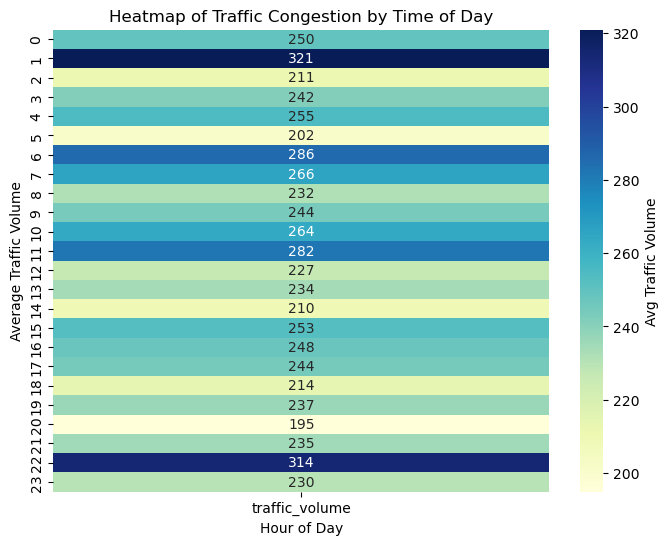

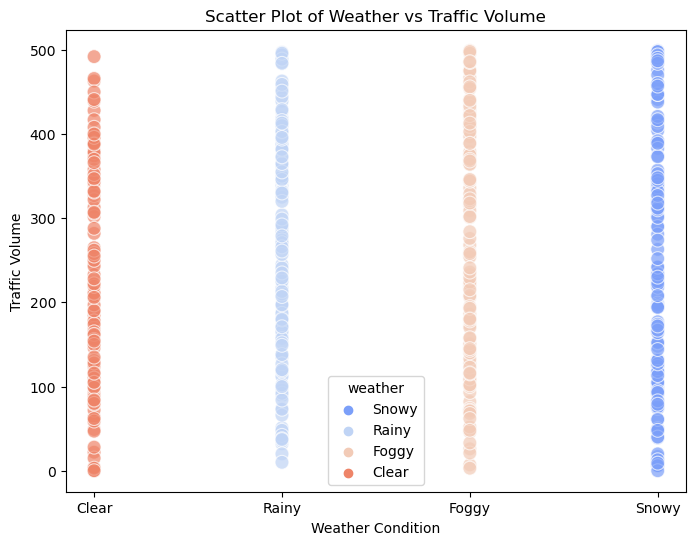

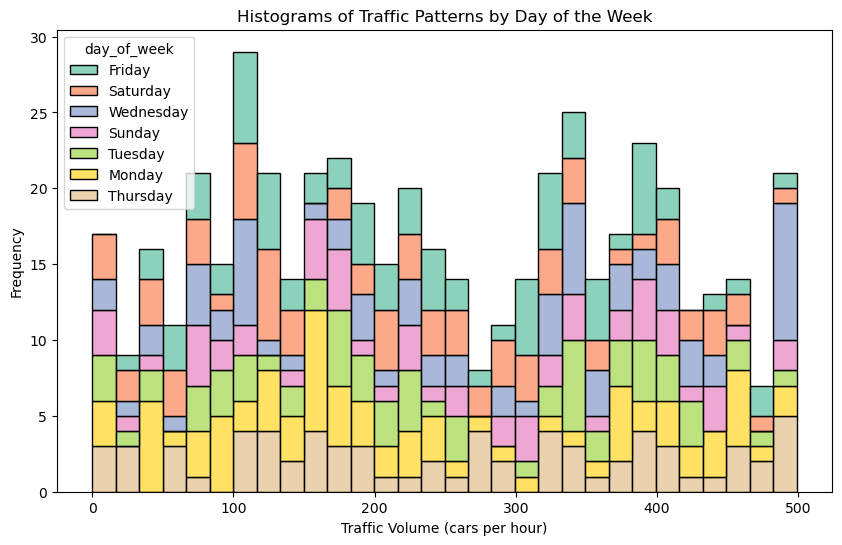

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Sample data creation
np.random.seed(0)

# Simulating data for traffic volume (cars per hour), weather conditions, and time of day
data = {
    'hour_of_day': np.random.randint(0, 24, 500),  # 24-hour format
    'traffic_volume': np.random.randint(0, 500, 500),  # Cars per hour
    'weather': np.random.choice(['Clear', 'Rainy', 'Foggy', 'Snowy'], 500),
    'day_of_week': np.random.choice(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], 500)
}

df = pd.DataFrame(data)

# 1. Heatmap of Traffic Congestion by Time of Day
# We will pivot the data to get the congestion (traffic_volume) per hour
traffic_heatmap_data = df.pivot_table(values='traffic_volume', index='hour_of_day', aggfunc=np.mean)

plt.figure(figsize=(8, 6))
sns.heatmap(traffic_heatmap_data, cmap='YlGnBu', cbar_kws={'label': 'Avg Traffic Volume'}, annot=True, fmt='.0f')
plt.title('Heatmap of Traffic Congestion by Time of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Average Traffic Volume')
plt.show()

# 2. Scatter Plot Showing the Relationship Between Weather and Traffic Volume
# Encoding weather as numerical values for scatter plot
weather_map = {'Clear': 1, 'Rainy': 2, 'Foggy': 3, 'Snowy': 4}
df['weather_numeric'] = df['weather'].map(weather_map)

plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='weather_numeric', y='traffic_volume', hue='weather', palette='coolwarm', s=100, alpha=0.7)
plt.title('Scatter Plot of Weather vs Traffic Volume')
plt.xlabel('Weather Condition')
plt.ylabel('Traffic Volume')
plt.xticks(ticks=[1, 2, 3, 4], labels=['Clear', 'Rainy', 'Foggy', 'Snowy'])
plt.show()

# 3. Histograms of Traffic Patterns by Day of the Week
# Plotting traffic patterns for each day of the week
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='traffic_volume', hue='day_of_week', multiple='stack', palette='Set2', bins=30)
plt.title('Histograms of Traffic Patterns by Day of the Week')
plt.xlabel('Traffic Volume (cars per hour)')
plt.ylabel('Frequency')
plt.show()


In [ ]:
SELECT location, time_of_day, SUM(traffic_volume) AS traffic_volume
FROM traffic_data
GROUP BY location, time_of_day;

Accuracy: 100.00%


<Figure size 600x600 with 0 Axes>

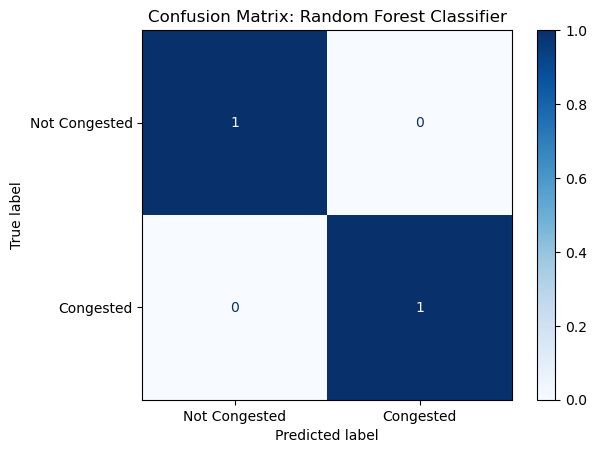

Model performs well in classifying congestion states (congested or not).


In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns
import matplotlib.pyplot as plt

# Sample data for demonstration purposes (replace with your actual data)
data = {
    'location': ['Location A', 'Location A', 'Location B', 'Location B', 'Location C', 'Location C'],
    'time_of_day': [9, 18, 9, 18, 9, 18],  # Hour of day (e.g., 9 for morning, 18 for evening)
    'weather': [1, 2, 1, 2, 1, 2],  # 1 for Clear, 2 for Rainy (e.g., encoded values)
    'traffic_volume': [150, 300, 200, 400, 100, 250],  # Traffic volume
    'congestion': [0, 1, 0, 1, 0, 1]  # 0 for not congested, 1 for congested
}

# Create a DataFrame
df = pd.DataFrame(data)

# Features (independent variables) and target (dependent variable)
X = df[['time_of_day', 'weather', 'traffic_volume']]  # Features
y = df['congestion']  # Target

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

# Make predictions
y_pred = rf_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Not Congested', 'Congested'])

# Plot the Confusion Matrix
plt.figure(figsize=(6, 6))
cm_display.plot(cmap='Blues')
plt.title('Confusion Matrix: Random Forest Classifier')
plt.show()

# Conclusion
if accuracy >= 0.8:
    conclusion = "Model performs well in classifying congestion states (congested or not)."
else:
    conclusion = "Model requires improvement."

print(conclusion)